In [410]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [411]:
df = pd.read_csv('dataset/hcho.csv')
df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12649,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12650,0.000080,Kandy Proper,2023-12-31,2024-01-01
12651,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12652,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [412]:
df['Current date'] = pd.to_datetime(df['Current date'])
df['Next date'] = pd.to_datetime(df['Next date'])

In [413]:
df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12649,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12650,0.000080,Kandy Proper,2023-12-31,2024-01-01
12651,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12652,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [414]:
#df.set_index('Current date', inplace=True)

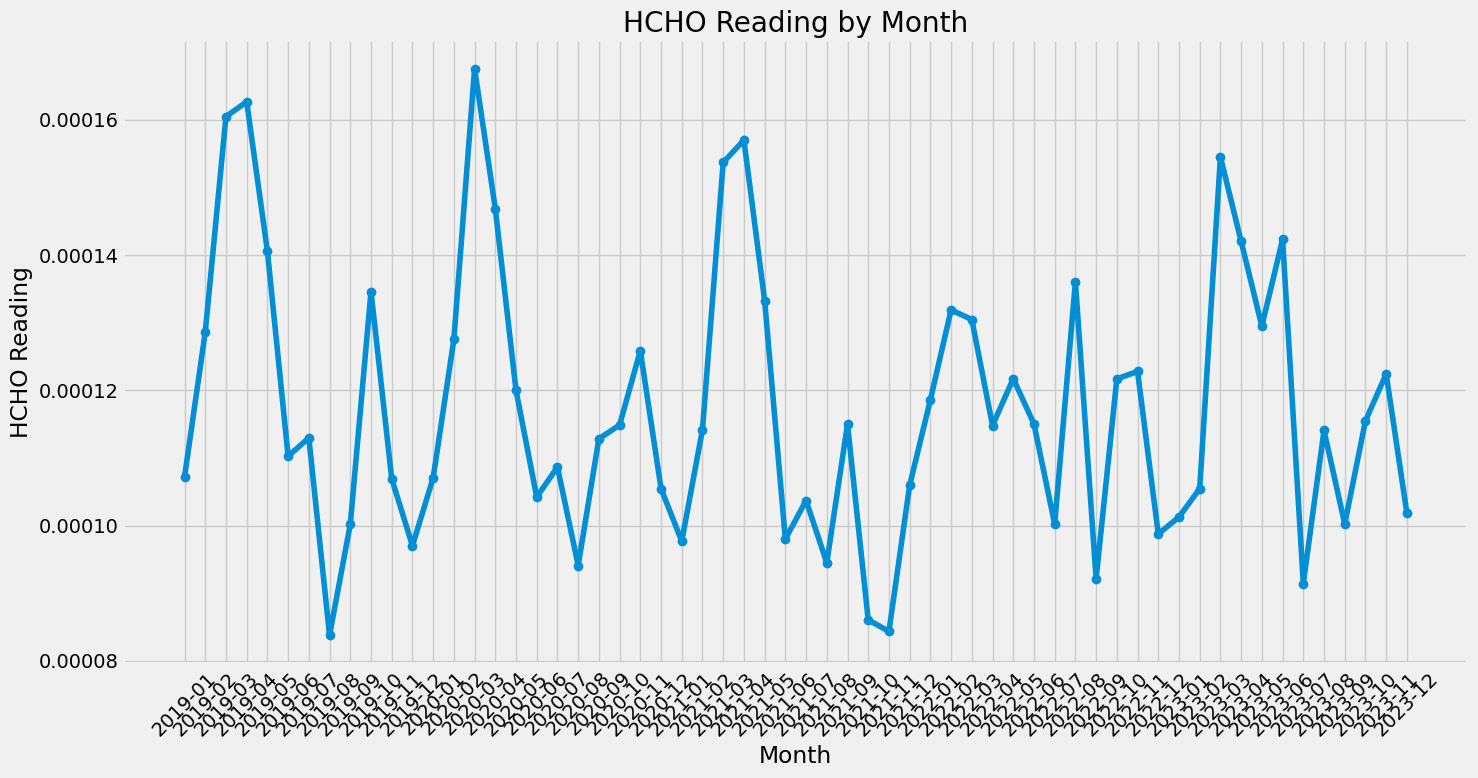

In [415]:
# Convert 'Current date' to datetime format
df['Current date'] = pd.to_datetime(df['Current date'])

# Group data by month and calculate the mean HCHO reading for each month
df_monthly = df.groupby(df['Current date'].dt.to_period("M")).agg({'HCHO': 'mean'})

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(df_monthly.index.astype(str), df_monthly['HCHO'], marker='o', linestyle='-')
plt.title('HCHO Reading by Month')
plt.xlabel('Month')
plt.ylabel('HCHO Reading')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

In [416]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

In [417]:
# Check the stationarity of the time series data
result = adfuller(df['HCHO'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

ADF Statistic: -14.259795482029029
p-value: 1.4331519884837988e-26
Critical Values:
	1%: -3.430868398266322
	5%: -2.8617691064302537
	10%: -2.5668919483741086


In [418]:
# If the data is not stationary, take the first difference
if result[1] > 0.05:
    df['HCHO_diff'] = df['HCHO'] - df['HCHO'].shift(1)
    df.dropna(inplace=True)
else:
    df['HCHO_diff'] = df['HCHO']

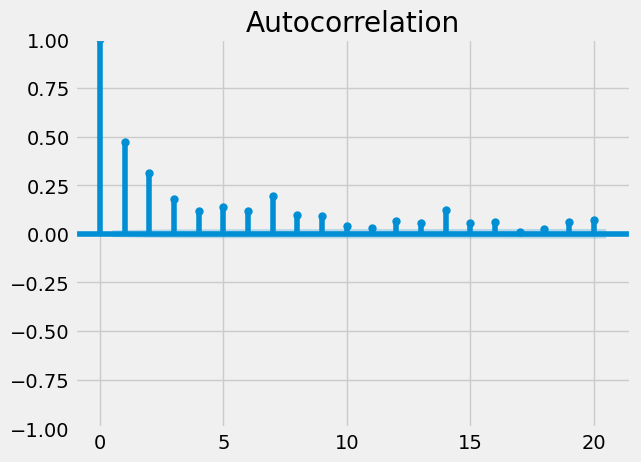

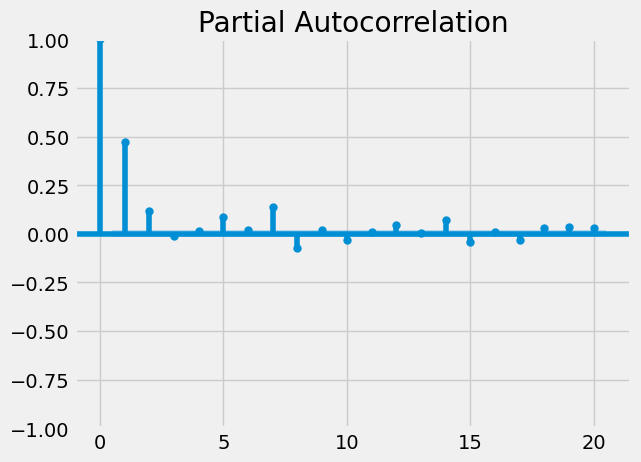

In [419]:
# Plot ACF and PACF to determine p and q for ARIMA model
plot_acf(df['HCHO_diff'], lags=20)
plot_pacf(df['HCHO_diff'], lags=20)
plt.show()

ADF Statistic: -14.259795482029029
p-value: 1.4331519884837988e-26
Critical Values:
	1%: -3.430868398266322
	5%: -2.8617691064302537
	10%: -2.5668919483741086


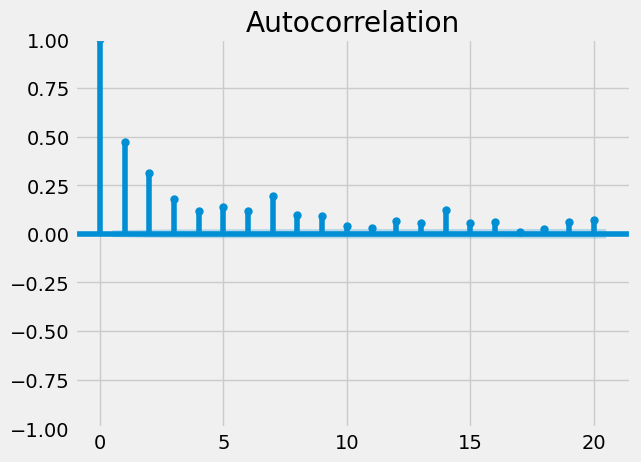

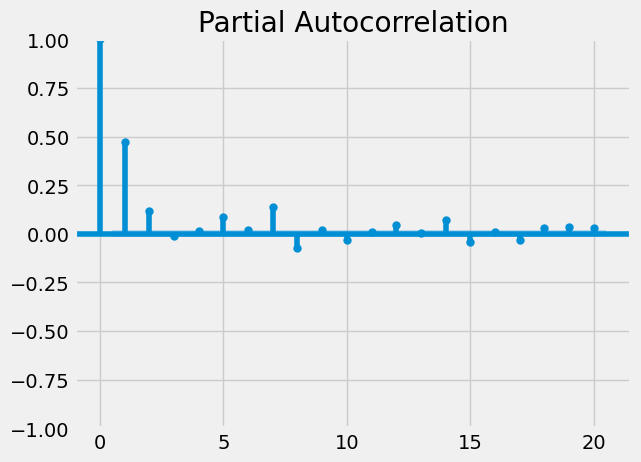

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  r

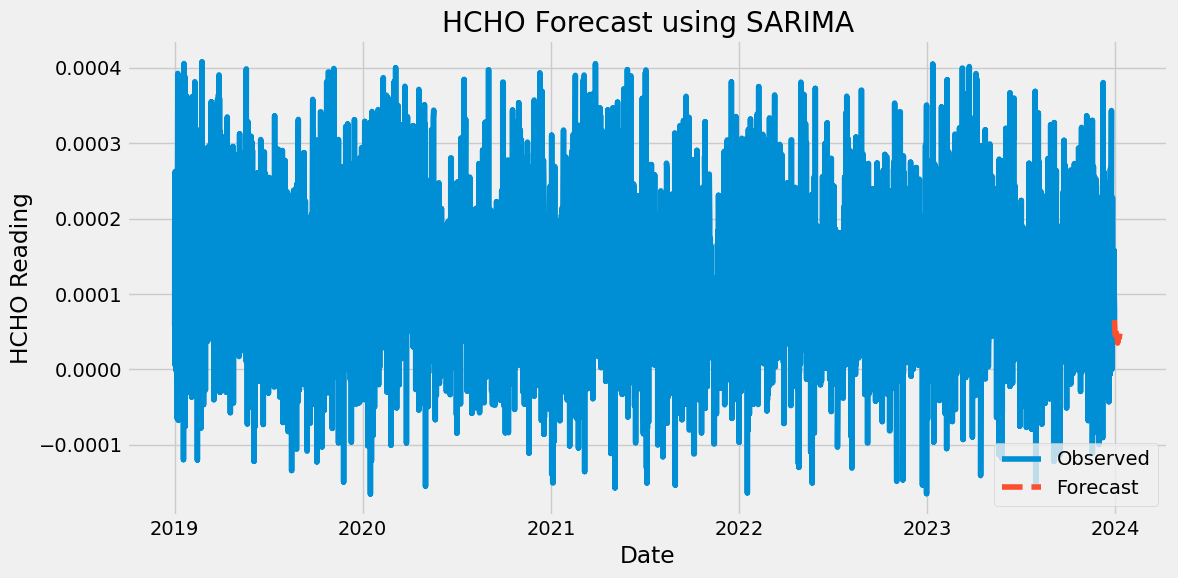

In [420]:
# Convert 'Current date' to datetime format and set as index
df['Current date'] = pd.to_datetime(df['Current date'])
df.set_index('Current date', inplace=True)

# Check the stationarity of the time series data
result = adfuller(df['HCHO'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# If the data is not stationary, take the first difference
if result[1] > 0.05:
    df['HCHO_diff'] = df['HCHO'] - df['HCHO'].shift(1)
    df.dropna(inplace=True)
else:
    df['HCHO_diff'] = df['HCHO']

# Plot ACF and PACF to determine p, q, P, and Q for SARIMA model
plot_acf(df['HCHO_diff'], lags=20)
plot_pacf(df['HCHO_diff'], lags=20)
plt.show()

# Train SARIMA model
model = SARIMAX(df['HCHO'], order=(1,0,1), seasonal_order=(1,0,1,12))  # p=1, d=0, q=1; P=1, D=0, Q=1, m=12
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=12)  # Forecasting 12 months ahead

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['HCHO'], label='Observed')
plt.plot(pd.date_range(start=df.index[-1], periods=13), np.append(df['HCHO'].iloc[-1], forecast), label='Forecast', linestyle='--')
plt.title('HCHO Forecast using SARIMA')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

In [421]:
df

,HCHO,Location,Next date,HCHO_diff
Current date,,,,
2019-01-01,0.000197,Colombo Proper,2019-01-02,0.000197
2019-01-01,0.000197,"Deniyaya, Matara",2019-01-02,0.000197
2019-01-01,0.000176,Nuwara Eliya Proper,2019-01-02,0.000176
2019-01-01,0.000176,Kandy Proper,2019-01-02,0.000176
2019-01-01,0.000176,"Bibile, Monaragala",2019-01-02,0.000176
...,...,...,...,...
2023-12-31,0.000080,Nuwara Eliya Proper,2024-01-01,0.000080
2023-12-31,0.000080,Kandy Proper,2024-01-01,0.000080
2023-12-31,0.000065,"Bibile, Monaragala",2024-01-01,0.000065


LSTM


In [422]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [423]:
import datetime

In [424]:
df = pd.read_csv('dataset/hcho.csv')
df

,HCHO,Location,Current date,Next date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000197,"Deniyaya, Matara",2019-01-01,2019-01-02
2,0.000176,Nuwara Eliya Proper,2019-01-01,2019-01-02
3,0.000176,Kandy Proper,2019-01-01,2019-01-02
4,0.000176,"Bibile, Monaragala",2019-01-01,2019-01-02
...,...,...,...,...
12649,0.000080,Nuwara Eliya Proper,2023-12-31,2024-01-01
12650,0.000080,Kandy Proper,2023-12-31,2024-01-01
12651,0.000065,"Bibile, Monaragala",2023-12-31,2024-01-01
12652,0.000065,Kurunegala Proper,2023-12-31,2024-01-01


In [425]:
df.describe()

,HCHO
count,12654.000000
mean,0.000117
std,0.000090
min,-0.000165
25%,0.000059
50%,0.000111
75%,0.000171
max,0.000408


In [426]:
df['Current date'] = pd.to_datetime(df['Current date'])

# Set 'Current date' as the index
df = df.set_index('Current date')

In [427]:
df= df[df['Location'] == 'Colombo Proper']
df

,HCHO,Location,Next date
Current date,,,
2019-01-01,0.000197,Colombo Proper,2019-01-02
2019-01-02,0.000263,Colombo Proper,2019-01-03
2019-01-03,0.000099,Colombo Proper,2019-01-04
2019-01-04,0.000210,Colombo Proper,2019-01-05
2019-01-05,0.000179,Colombo Proper,2019-01-06
...,...,...,...
2023-12-27,0.000118,Colombo Proper,2023-12-28
2023-12-28,0.000075,Colombo Proper,2023-12-29
2023-12-29,0.000051,Colombo Proper,2023-12-30


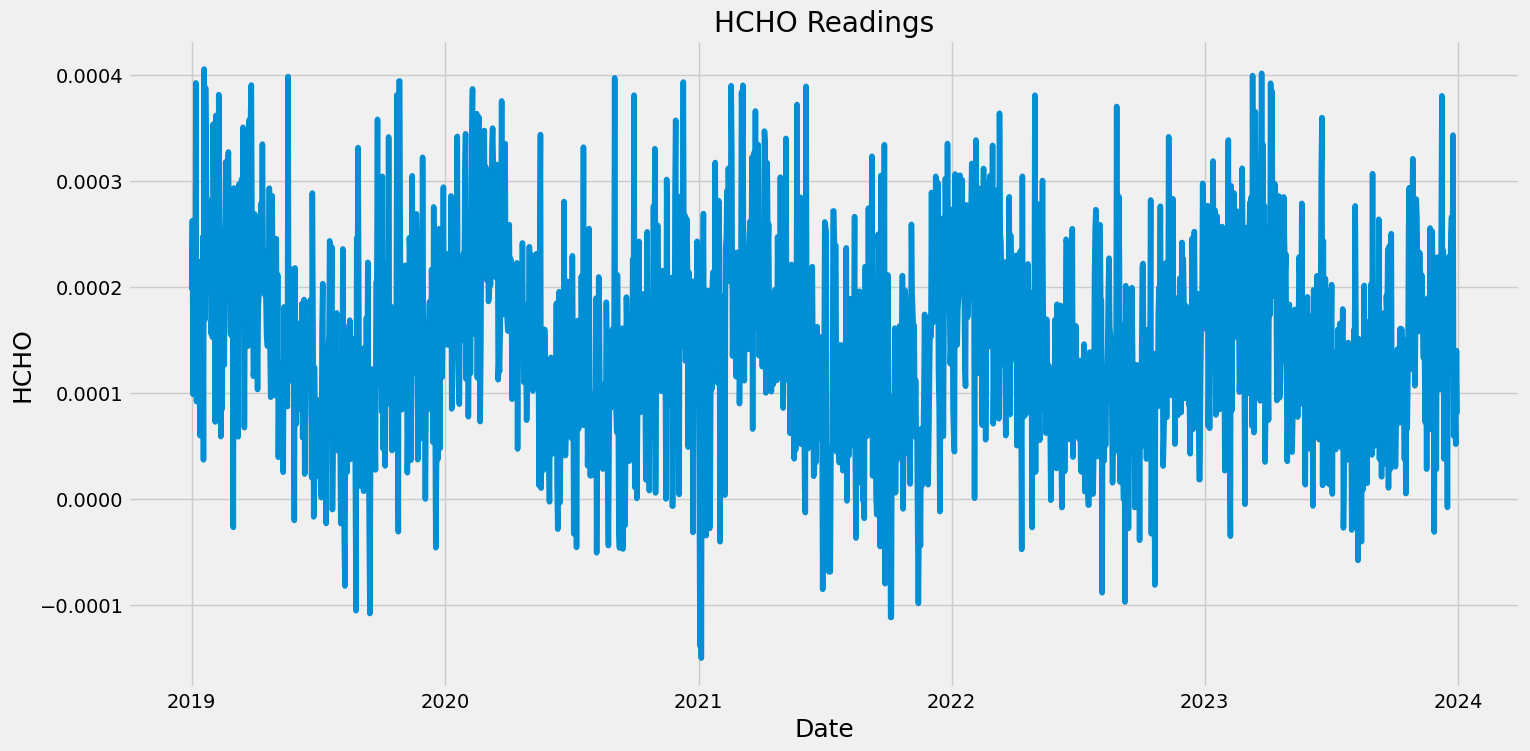

In [428]:
plt.figure(figsize=(16,8))
plt.title('HCHO Readings')
plt.plot(df['HCHO'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('HCHO', fontsize = 18)
plt.show()

In [429]:
# Creating a new dataframe with only the 'Close' column

data = df.filter(['HCHO'])
dataset = data.values
training_data_len = math.ceil( len(dataset) * .8)

training_data_len

1444

In [430]:
data

,HCHO
Current date,
2019-01-01,0.000197
2019-01-02,0.000263
2019-01-03,0.000099
2019-01-04,0.000210
2019-01-05,0.000179
...,...
2023-12-27,0.000118
2023-12-28,0.000075
2023-12-29,0.000051


In [431]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


for i in scaled_data:
    print(i)

[0.6247585]
[0.74261318]
[0.4477804]
[0.6480326]
[0.5915966]
[0.46523063]
[0.97651282]
[0.4352171]
[0.48746154]
[0.5039519]
[0.6731727]
[0.55278684]
[0.37776878]
[0.51088425]
[0.38527148]
[0.48298295]
[0.71511858]
[0.33661723]
[1.]
[0.57407515]
[0.96837411]
[0.86077576]
[0.65674607]
[0.6925951]
[0.77773354]
[0.72135712]
[0.62537933]
[0.72995925]
[0.55095967]
[0.57870882]
[0.54458773]
[0.90655374]
[0.76601682]
[0.68749066]
[0.40089859]
[0.92109086]
[0.88733097]
[0.65234533]
[0.57262675]
[0.95660119]
[0.74716011]
[0.62690735]
[0.37600218]
[0.72774559]
[0.42300071]
[0.67330284]
[0.64662569]
[0.49766233]
[0.67604105]
[0.84241758]
[0.75973293]
[0.67159839]
[0.83669515]
[0.85920468]
[0.69542507]
[0.70651257]
[0.55192037]
[0.54786168]
[0.67872305]
[0.64812518]
[0.22188337]
[0.79808484]
[0.67014105]
[0.5148795]
[0.6344597]
[0.56623515]
[0.37565555]
[0.80446021]
[0.70231265]
[0.7339729]
[0.72873059]
[0.81323873]
[0.59253224]
[0.90108676]
[0.71911142]
[0.39126861]
[0.64358755]
[0.7308271]
[0.567

In [432]:
train_data = scaled_data[0:training_data_len, :]
#Split the data
x_train = []
y_train = []


for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i <=61:
        print(x_train)
        print(y_train)
        print()

[array([0.6247585 , 0.74261318, 0.4477804 , 0.6480326 , 0.5915966 ,
       0.46523063, 0.97651282, 0.4352171 , 0.48746154, 0.5039519 ,
       0.6731727 , 0.55278684, 0.37776878, 0.51088425, 0.38527148,
       0.48298295, 0.71511858, 0.33661723, 1.        , 0.57407515,
       0.96837411, 0.86077576, 0.65674607, 0.6925951 , 0.77773354,
       0.72135712, 0.62537933, 0.72995925, 0.55095967, 0.57870882,
       0.54458773, 0.90655374, 0.76601682, 0.68749066, 0.40089859,
       0.92109086, 0.88733097, 0.65234533, 0.57262675, 0.95660119,
       0.74716011, 0.62690735, 0.37600218, 0.72774559, 0.42300071,
       0.67330284, 0.64662569, 0.49766233, 0.67604105, 0.84241758,
       0.75973293, 0.67159839, 0.83669515, 0.85920468, 0.69542507,
       0.70651257, 0.55192037, 0.54786168, 0.67872305, 0.64812518])]
[0.2218833724380872]

[array([0.6247585 , 0.74261318, 0.4477804 , 0.6480326 , 0.5915966 ,
       0.46523063, 0.97651282, 0.4352171 , 0.48746154, 0.5039519 ,
       0.6731727 , 0.55278684, 0.377

In [433]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [434]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1384, 60, 1)

In [435]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [436]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [437]:
model.fit(x_train,y_train, batch_size=1, epochs=1)

1384/1384 [==============================] - 21s 14ms/step - loss: 0.0269


In [438]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [439]:
x_test = np.array(x_test)

In [440]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [441]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 12ms/step


In [442]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

7.597042295873833e-06

In [443]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions


C:\Users\ASUS\AppData\Local\Temp\ipykernel_28828\3846301319.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


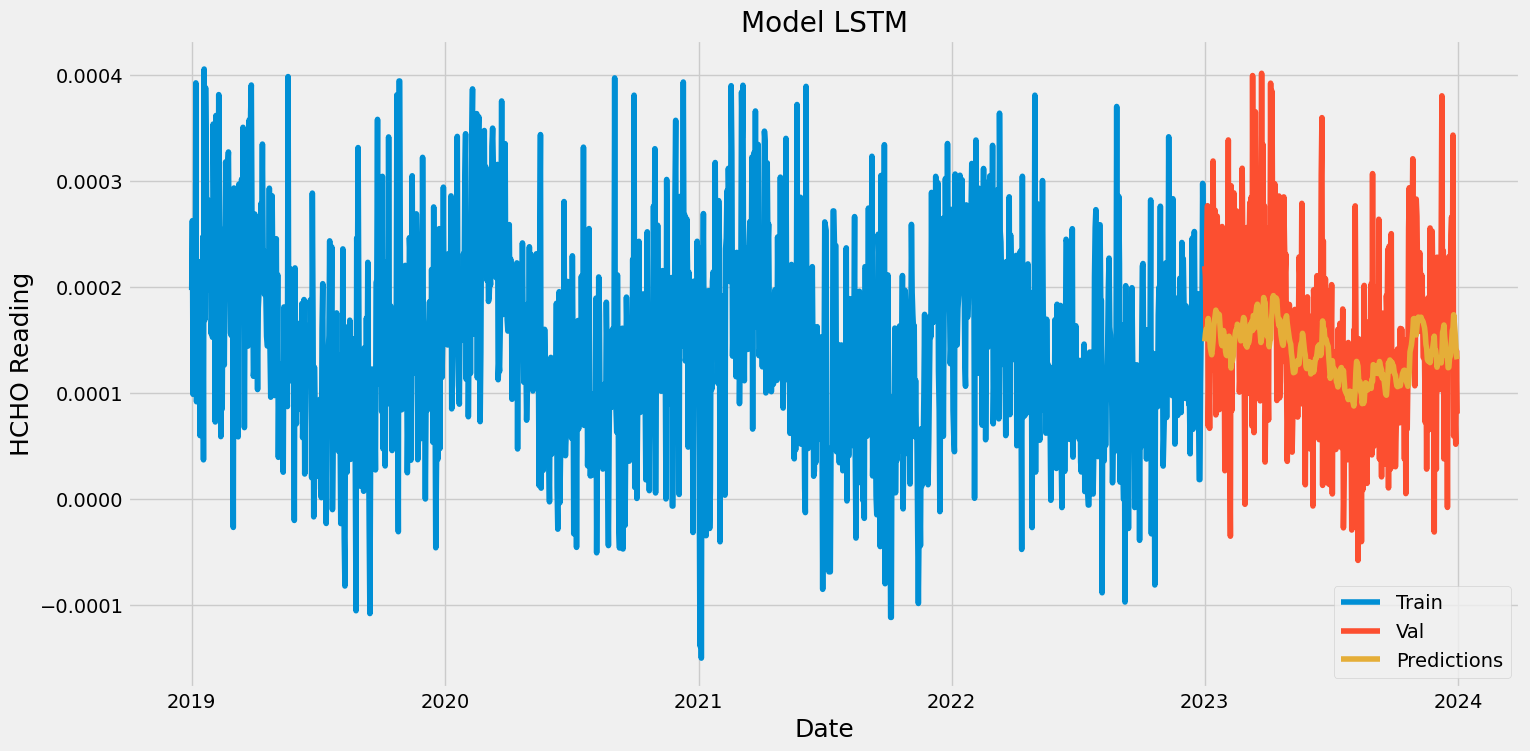

In [444]:
plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('HCHO Reading', fontsize = 18)
plt.plot(train['HCHO'])
plt.plot(valid[['HCHO', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()